# 15. Buffon's Needle

**Goal:** Estimate $\pi$ through geometric probability.

Drop a needle of length $L$ onto a floor with parallel lines spaced $D$ apart.
Probability of crossing: $P = \frac{2L}{\pi D}$. So $\pi = \frac{2L}{PD}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def buffon_simulate(n_needles, L=1.0, D=2.0):
    centers = np.random.uniform(0, D/2, n_needles)
    angles = np.random.uniform(0, np.pi, n_needles)
    half_proj = (L/2) * np.sin(angles)
    crossings = centers <= half_proj
    return centers, angles, crossings, half_proj

np.random.seed(42)
n = 100000
L, D = 1.0, 2.0
centers, angles, crossings, half_proj = buffon_simulate(n, L, D)

n_cross = np.sum(crossings)
pi_est = (2 * L * n) / (n_cross * D)
print(f'Needles: {n}')
print(f'Crossings: {n_cross}')
print(f'Pi estimate: {pi_est:.6f}')
print(f'True pi:     {np.pi:.6f}')
print(f'Error:       {abs(pi_est - np.pi):.6f}')

Needles: 100000
Crossings: 31896
Pi estimate: 3.135189
True pi:     3.141593
Error:       0.006403


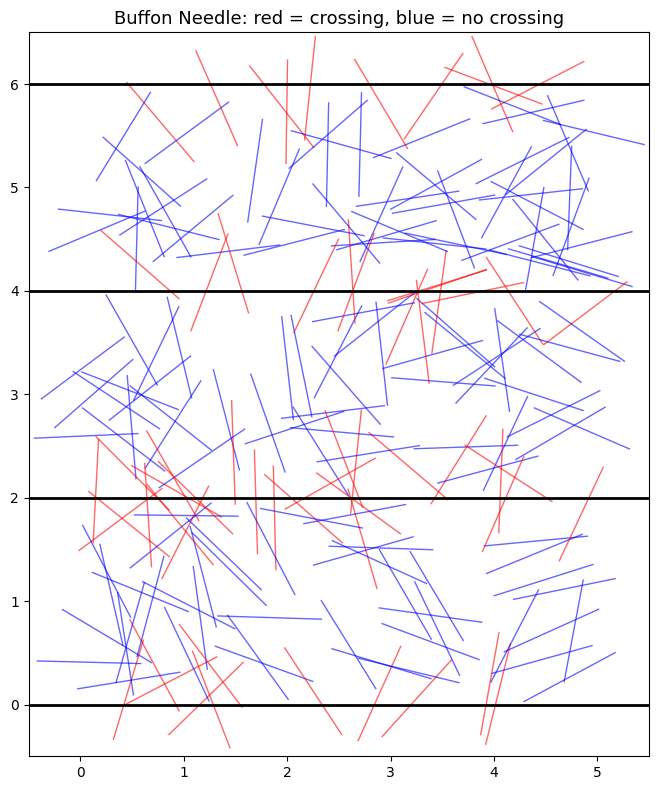

In [3]:
# Visualize needle drops
fig, ax = plt.subplots(figsize=(12, 8))
n_show = 200
for i in range(n_show):
    cx, cy = np.random.uniform(0, 5), np.random.uniform(0, 6)
    angle = angles[i]
    dx = (L/2) * np.cos(angle)
    dy = (L/2) * np.sin(angle)
    x1, y1 = cx - dx, cy - dy
    x2, y2 = cx + dx, cy + dy
    
    # Check if crosses a line at y = 0, D, 2D, ...
    y_min, y_max = min(y1,y2), max(y1,y2)
    crosses = any(y_min <= k*D <= y_max for k in range(10))
    color = 'red' if crosses else 'blue'
    ax.plot([x1,x2], [y1,y2], color=color, linewidth=1, alpha=0.6)

for k in range(4):
    ax.axhline(y=k*D, color='black', linewidth=2)
ax.set_xlim(-0.5, 5.5); ax.set_ylim(-0.5, 6.5)
ax.set_title(f'Buffon Needle: red = crossing, blue = no crossing', fontsize=13)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

## Convergence of the Estimate

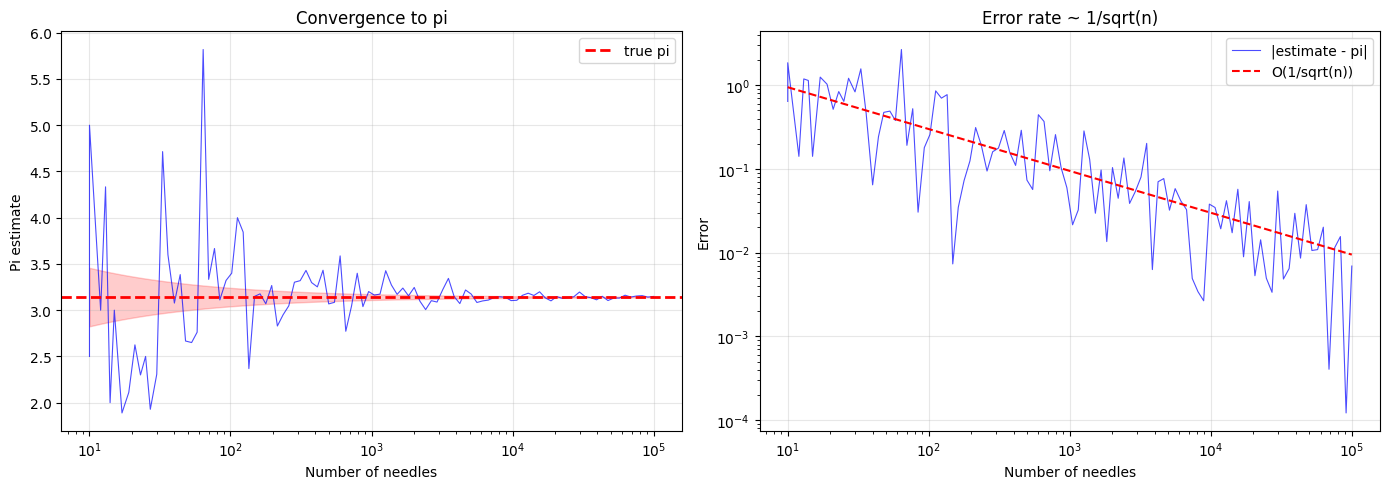

In [4]:
ns = np.logspace(1, 5, 100).astype(int)
pi_estimates = []
for n in ns:
    _, _, cr, _ = buffon_simulate(n, L, D)
    nc = np.sum(cr)
    if nc > 0:
        pi_estimates.append(2*L*n / (nc*D))
    else:
        pi_estimates.append(np.nan)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.semilogx(ns, pi_estimates, 'b-', linewidth=0.8, alpha=0.7)
ax1.axhline(np.pi, color='red', linewidth=2, linestyle='--', label='true pi')
ax1.fill_between(ns, np.pi - 1/np.sqrt(ns), np.pi + 1/np.sqrt(ns), alpha=0.2, color='red')
ax1.set_xlabel('Number of needles'); ax1.set_ylabel('Pi estimate')
ax1.set_title('Convergence to pi', fontsize=12)
ax1.legend(); ax1.grid(True, alpha=0.3)

errors = np.abs(np.array(pi_estimates) - np.pi)
ax2.loglog(ns, errors, 'b-', linewidth=0.8, alpha=0.7, label='|estimate - pi|')
ax2.loglog(ns, 3/np.sqrt(ns), 'r--', label='O(1/sqrt(n))')
ax2.set_xlabel('Number of needles'); ax2.set_ylabel('Error')
ax2.set_title('Error rate ~ 1/sqrt(n)', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Buffon's needle** connects geometric probability, measure theory, and $\pi$.
2. The crossing probability $2L/(\pi D)$ comes from integrating over the uniform measure on positions and angles.
3. Convergence rate is $O(1/\sqrt{n})$ — standard Monte Carlo.
4. One of the earliest examples of Monte Carlo estimation (1733).